<a href="https://colab.research.google.com/github/sbccas/data-analytics-using-python/blob/main/notebooks/Unit1_Fundamentals_of_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# TYBCA – Course 602: Data Analytics Using Python

---

## 🧩 UNIT 1 – FUNDAMENTALS OF DATA ANALYTICS

👨‍🏫 Prepared by: Hitesh Patel  
🏫 Institution: Sutex Bank College of Computer Applications and Science  
📚 Academic Year: 2025–26  

---

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/sbccas/data-analytics-python/blob/main/notebooks/Unit1_Fundamentals_of_Data_Analytics.ipynb)

---
### Unit-1 : Fundamentals of Data Analytics :

#### 1.1 Exploratory Data Analysis (EDA)
  - 1.1.1 Types of Exploratory Data Analysis:
  - 1.1.2 Univariate Analysis
  - 1.1.3 Bivariate Analysis
  - 1.1.4 Multivariate Analysis
  - 1.1.5 Handling Missing Data and Outliers
#### 1.2 Understanding the Data:
  - 1.2.1 Quantitative Data : Discrete and Continuous
  - 1.2.2 Qualitative Data : Non-numerical (Normal and Ordinal)
#### 1.3 Spread of Data
  - 1.3.1 Normal Distribution
  - 1.3.2 Skewed Distribution
  - 1.3.3 Skewness and Kurtiosis


# 1.1 Exploratory Data Analysis (EDA)
## What is EDA? (Exploratory Data Analysis)

Exploratory Data Analysis, EDA, is the first step in understanding a
dataset.

Before we build any machine learning model, we must explore the data to:
- Understand what'sin it
- Find patterns or trends
- Spot mistakes, missing values, or unusual data (outliers)

**Think of it like checking ingredients before cooking a dish** - you want to know what you have, what’s good, and what needs to be cleaned or
removed.



#### 1.1.1 Types of Exploratory DataAnalysis(EDA)
Exploratory Data Analysis (EDA) can be divided into three main types based on the
number of variables being analyzed:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis 

##### Univariate analysis:
Focuses on analyzing a single variable at a time. It helps us understand the basic
properties of that variable such as its distribution, central values (like mean and
median), and spread (like range or standard deviation). For
example, if we want to explore the marks scored by students in a class, we will look at one column (marks) and use tools like histograms or box plots to understand
how those marks are distributed.

##### Bivariate analysis:
Involves the study of two variables to explore the relationship or correlation
between them. It helps us find whether two variables move together
(positive or negative correlation), or how one affects the other. For instance, we
might analyze the relationship between "hours studied" and "marks
scored" to see if studying more results in higher marks. Common tools for
bivariate analysis include scatter plots, correlation coefficients, and line
graphs.

##### Multivariate analysis:
Deals with three or more variables at the same time. It is used when we want to
explore more complex patterns and interactions within the data. For example, we
might study how a student’s marks are affected by multiple factors like study
hours, sleep time, and attendance. This kind of analysis is especially useful in
machine learning when many input features are used to predict an output.
Visualization tools such as heatmaps, pair plots, and 3D scatter plots are often
used in multivariate analysis.

*In summary, univariate analysis gives us information about each individual
variable, bivariate analysis reveals how two variables relate to each other, and
multivariate analysis helps us understand relationships and patterns
among several variables at once.*

#### 1.1.2 Univariate Analysis

**What is Univariate Analysis?**
Univariate analysis means analyzing **one variable at a time.**
The term "uni" means **one**, and "variate" refers to a **variable** (or a column in a dataset). So, univariate analysis is all about **understanding the properties and patterns of a single variable** without involving any other variable.

It helps us answer questions like:
- What kind of values does the variable take?
- What is the average value?
- Is the data spread out or tightly packed?
- Are there any very high or very low values(outliers)?

There are two types of variables in univariate analysis:
1. Numerical (continuous or discrete) – like marks, height, age,salary
2. Categorical( non Numerical) – like gender, city, product category

Depending on the type of variable, we use different techniques:

- For numerical variables, we calculate:
  - Mean (average)
  - Median (middle value)
  - Mode (most frequent value)
  - Range, Variance, Standard Deviation
  - We also plot **histograms** and **box plots**

- For categorical variables, we look at:
  - Frequency count (how many times each category appears)
  - Percentages or proportions
  - We use **bar charts** and **pie charts** to visualize

*In short, univariate analysis gives us a **basic understanding of one column**
of data. It is often the first step before analyzing relationships between variables (which is done in bivariate or multivariate analysis).*


**Univariate Analysis Example**

**Let’s say we are working with a dataset named “Students Performance in Exams”**
that contains student information such as:
 - Gender
 - Math score
 - Reading score
 - Writing score

**Now, let’s perform univariate analysis** on one variable:

**Example 1: Numerical Variable – Math Score** 

We want to analyze the column “math score”. We can
ask:
 - What is the average math score?
 - What isthe highest and lowestscore?
 - Are most students scoring between 60 and 80?
 - Are there any students scoring very low or very high?

**We can use:**
 - **Descriptive statistics** like mean, median, max, min
 - **Histogram** to see the distribution
 - **Box plot** to detect outliers



---

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/sbccas/data-analytics-python/blob/main/notebooks/Unit1_Fundamentals_of_Data_Analytics.ipynb)

---

## 💻 2. Load and View Dataset

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
# # Load dataset (you can upload a CSV file to Colab)
# from google.colab import files
# uploaded = files.upload()

# # Use below code if you want to use kagglehub to fetch datasets from Kaggle
# !pip install kagglehub
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("sadiajavedd/students-academic-performance-dataset")
# print("Path to dataset files:", path)

# Use this to upload files if you are working on local machine
# import tkinter as tk
# from tkinter import filedialog
# root = tk.Tk()
# root.withdraw()
# file_path = filedialog.askopenfilename()  
# df = pd.read_csv(file_path)

# Load dataset from local path
data_path = Path(r"F:\SBCCAS_DRIVE\My Drive\Master Drive\STUDENT MATERIAL\BCA\Sem_6\602_Data_Analytics_using_Python\data-analytics-using-python\2_Lecture_Notes\datasets\StudentsPerformance.csv")
df = pd.read_csv(data_path)
# Display first few rows of the dataset
print(df.head())
# Display dataset shape
print("Dataset Shape:", df.shape)
# Display last few rows of the dataset
df.tail()
# # Use pandas to read the uploaded CSV file
# df = pd.read_csv(next(iter(uploaded)))
#df=pd.read_csv("StudentsPerformance.csv")

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Dataset Shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# 📊 3. Understanding the Dataset


In [4]:
# Overview of data
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
# Summary statistics for 'math score' column
print("\nMath Score Statistics:")
print(df['math score'].describe())

# Data types and null values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000   

# 🔹 4. Univariate Analysis

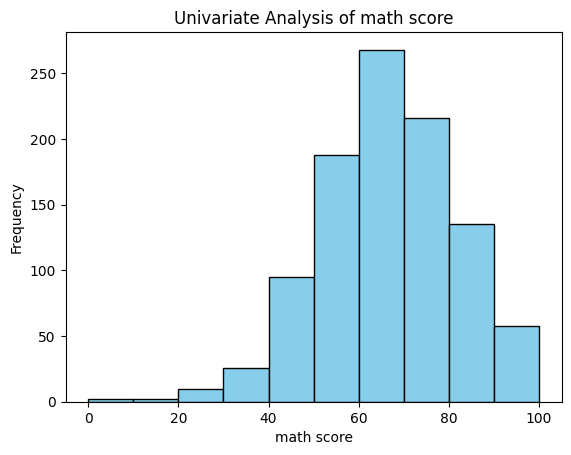

In [ ]:
# Histogram for numeric column
# plt.hist(df['math score'],bins=10, edgecolor='black')
#plt.show

# numeric_col = df.select_dtypes(include=np.number).columns[0]
# plt.hist(df[numeric_col], bins=10, color='skyblue', edgecolor='black')
# plt.title(f'Univariate Analysis of {numeric_col}')
# plt.xlabel(numeric_col)
# plt.ylabel('Frequency')
# plt.show()


## Example 2: Categorical Variable(Non Numerical) – Gender
Now we analyze the column “gender”.
We can ask:
• How many male and female students are there?
• Which gender is more in the class? 
We can use:
• Value countsto get the frequency
• Bar chart to visualize
Code:

gender
female    518
male      482
Name: count, dtype: int64


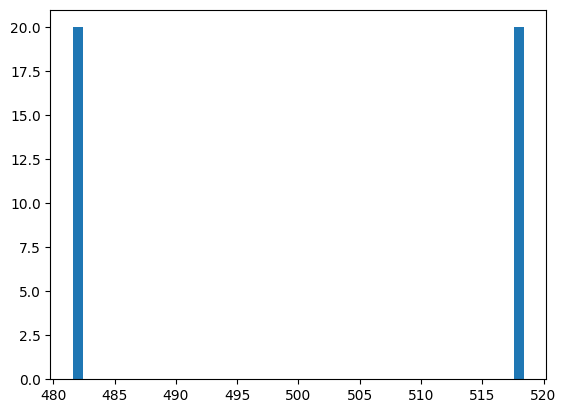

In [17]:
print(df['gender'].value_counts())
data=df['gender'].value_counts()
plt.bar(data,height=20)
plt.show()


# 🔸 5. Bivariate Analysis

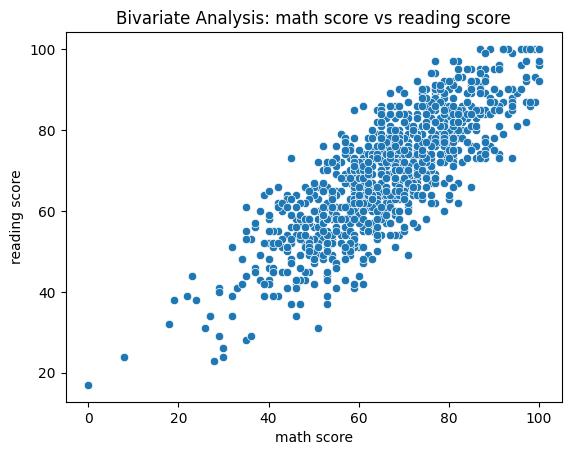

In [19]:
# Example: Correlation between two numeric columns
if len(df.select_dtypes(include=np.number).columns) >= 2:
    x = df.select_dtypes(include=np.number).columns[0]
    y = df.select_dtypes(include=np.number).columns[1]
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f'Bivariate Analysis: {x} vs {y}')
    plt.show()


# 🔹 6. Handling Missing Data

In [20]:
# Replace missing numeric values with column mean
df.fillna(df.mean(), inplace=True)
print("Missing values handled successfully!")


TypeError: Could not convert ['femalefemalefemalemalemalefemalefemalemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalefemalefemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalemalemalefemalefemalefemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalemalemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalefemalefemalefemalemalemalemalefemalemalemalefemalefemalefemalemalemalefemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalefemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalefemalefemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalefemalemalefemalemalemalefemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalefemalemalemalefemalemalemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalefemalefemalemalemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalefemalefemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalefemalefemalemalemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalemalefemalemalefemalefemalefemalefemalemalefemalemalefemalefemalemalefemalefemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalefemalefemalefemalefemalemalefemalefemalemalefemalemalemalemalefemalemalemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalefemalemalemalefemalemalemalefemalemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalemalemalemalefemalemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalemalemalemalemalefemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalemalemalefemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalefemalefemalefemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalemalemalemalemalefemalemalefemalefemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalemalefemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalemalefemalefemalemalefemalemalefemalemalefemalemalefemalefemalemalefemalemalefemalemalemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalefemalemalefemalefemalefemalemalefemalemalefemalefemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalefemalefemalemalefemalemalefemalemalefemalefemalemalefemalemalemalefemalefemalemalefemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalemalemalemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalemalefemalemalefemalefemalefemale'
 'group Bgroup Cgroup Bgroup Agroup Cgroup Bgroup Bgroup Bgroup Dgroup Bgroup Cgroup Dgroup Bgroup Agroup Agroup Cgroup Cgroup Bgroup Cgroup Cgroup Dgroup Bgroup Dgroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Egroup Egroup Dgroup Dgroup Dgroup Bgroup Cgroup Cgroup Bgroup Bgroup Egroup Bgroup Agroup Cgroup Dgroup Cgroup Egroup Egroup Cgroup Dgroup Cgroup Cgroup Egroup Dgroup Dgroup Cgroup Egroup Agroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Bgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Bgroup Egroup Agroup Dgroup Egroup Bgroup Bgroup Agroup Egroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Egroup Dgroup Dgroup Bgroup Dgroup Dgroup Bgroup Cgroup Cgroup Dgroup Egroup Bgroup Bgroup Dgroup Cgroup Agroup Dgroup Egroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Bgroup Cgroup Dgroup Egroup Bgroup Bgroup Dgroup Dgroup Agroup Dgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Dgroup Dgroup Cgroup Egroup Agroup Dgroup Cgroup Bgroup Cgroup Dgroup Egroup Agroup Agroup Bgroup Dgroup Dgroup Cgroup Egroup Bgroup Bgroup Dgroup Bgroup Egroup Bgroup Cgroup Egroup Cgroup Cgroup Bgroup Bgroup Cgroup Agroup Egroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Cgroup Egroup Dgroup Cgroup Cgroup Egroup Dgroup Bgroup Cgroup Egroup Dgroup Bgroup Dgroup Cgroup Dgroup Cgroup Egroup Bgroup Bgroup Cgroup Dgroup Cgroup Bgroup Cgroup Dgroup Egroup Egroup Bgroup Bgroup Dgroup Cgroup Cgroup Cgroup Egroup Bgroup Egroup Cgroup Bgroup Bgroup Dgroup Bgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Agroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Dgroup Dgroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Dgroup Cgroup Egroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Dgroup Cgroup Dgroup Dgroup Egroup Cgroup Cgroup Dgroup Dgroup Bgroup Cgroup Cgroup Egroup Cgroup Bgroup Dgroup Dgroup Dgroup Dgroup Bgroup Bgroup Egroup Bgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Dgroup Bgroup Agroup Egroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Cgroup Agroup Egroup Cgroup Bgroup Dgroup Bgroup Bgroup Dgroup Cgroup Cgroup Cgroup Dgroup Cgroup Bgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Cgroup Agroup Cgroup Bgroup Cgroup Cgroup Egroup Bgroup Cgroup Bgroup Dgroup Cgroup Bgroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Bgroup Cgroup Dgroup Egroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Dgroup Dgroup Bgroup Bgroup Cgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Dgroup Egroup Cgroup Dgroup Dgroup Dgroup Egroup Dgroup Dgroup Agroup Agroup Bgroup Cgroup Cgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Bgroup Dgroup Cgroup Agroup Agroup Dgroup Cgroup Cgroup Bgroup Bgroup Dgroup Dgroup Dgroup Egroup Dgroup Bgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Bgroup Cgroup Cgroup Cgroup Agroup Cgroup Cgroup Cgroup Cgroup Agroup Cgroup Cgroup Dgroup Dgroup Cgroup Dgroup Cgroup Dgroup Agroup Bgroup Agroup Cgroup Dgroup Cgroup Bgroup Bgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Cgroup Bgroup Egroup Cgroup Agroup Cgroup Dgroup Agroup Agroup Cgroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Egroup Dgroup Dgroup Egroup Bgroup Dgroup Cgroup Agroup Bgroup Cgroup Dgroup Cgroup Bgroup Agroup Agroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Dgroup Bgroup Agroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Dgroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Egroup Bgroup Cgroup Cgroup Dgroup Egroup Agroup Cgroup Dgroup Cgroup Dgroup Dgroup Egroup Agroup Cgroup Cgroup Cgroup Cgroup Bgroup Bgroup Dgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Bgroup Bgroup Egroup Dgroup Bgroup Dgroup Bgroup Agroup Cgroup Cgroup Egroup Agroup Agroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Cgroup Agroup Egroup Egroup Cgroup Cgroup Bgroup Agroup Dgroup Dgroup Dgroup Cgroup Egroup Dgroup Dgroup Cgroup Cgroup Cgroup Egroup Bgroup Dgroup Cgroup Cgroup Cgroup Agroup Cgroup Egroup Dgroup Dgroup Cgroup Cgroup Bgroup Cgroup Agroup Egroup Dgroup Bgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Agroup Bgroup Dgroup Egroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Bgroup Dgroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Agroup Bgroup Bgroup Cgroup Dgroup Dgroup Dgroup Cgroup Cgroup Dgroup Cgroup Dgroup Cgroup Cgroup Bgroup Cgroup Dgroup Cgroup Dgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Dgroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Egroup Dgroup Agroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Cgroup Egroup Bgroup Agroup Dgroup Bgroup Agroup Dgroup Cgroup Dgroup Dgroup Cgroup Egroup Dgroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Bgroup Egroup Egroup Egroup Dgroup Cgroup Bgroup Agroup Cgroup Dgroup Egroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Agroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Bgroup Dgroup Egroup Cgroup Cgroup Cgroup Egroup Dgroup Egroup Dgroup Bgroup Cgroup Dgroup Dgroup Bgroup Dgroup Bgroup Cgroup Bgroup Dgroup Agroup Bgroup Dgroup Bgroup Cgroup Bgroup Bgroup Bgroup Cgroup Agroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Bgroup Egroup Bgroup Cgroup Cgroup Bgroup Dgroup Dgroup Egroup Bgroup Egroup Dgroup Egroup Egroup Cgroup Cgroup Cgroup Egroup Bgroup Cgroup Agroup Dgroup Egroup Cgroup Bgroup Agroup Agroup Cgroup Egroup Cgroup Bgroup Agroup Dgroup Bgroup Cgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Cgroup Cgroup Dgroup Bgroup Agroup Cgroup Agroup Bgroup Bgroup Cgroup Egroup Agroup Bgroup Cgroup Dgroup Cgroup Bgroup Bgroup Dgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Bgroup Cgroup Cgroup Egroup Dgroup Cgroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Bgroup Cgroup Bgroup Egroup Cgroup Cgroup Dgroup Cgroup Dgroup Dgroup Cgroup Egroup Bgroup Dgroup Egroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Egroup Agroup Dgroup Egroup Egroup Bgroup Bgroup Dgroup Dgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Bgroup Dgroup Cgroup Egroup Dgroup Agroup Cgroup Cgroup Bgroup Egroup Egroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Bgroup Dgroup Egroup Egroup Dgroup Egroup Cgroup Cgroup Dgroup Dgroup Cgroup Cgroup Dgroup Agroup Egroup Dgroup Dgroup Cgroup Dgroup Cgroup Agroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Dgroup Egroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Cgroup Agroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Cgroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Agroup Cgroup Bgroup Cgroup Dgroup Cgroup Bgroup Dgroup Bgroup Agroup Cgroup Agroup Cgroup Egroup Agroup Dgroup Egroup Bgroup Dgroup Dgroup Agroup Egroup Cgroup Cgroup Dgroup D'
 "bachelor's degreesome collegemaster's degreeassociate's degreesome collegeassociate's degreesome collegesome collegehigh schoolhigh schoolassociate's degreeassociate's degreehigh schoolsome collegemaster's degreesome high schoolhigh schoolsome high schoolmaster's degreeassociate's degreehigh schoolsome collegesome collegesome high schoolbachelor's degreemaster's degreesome collegebachelor's degreehigh schoolmaster's degreesome collegesome collegemaster's degreesome collegesome collegeassociate's degreeassociate's degreesome high schoolassociate's degreeassociate's degreeassociate's degreeassociate's degreeassociate's degreesome collegeassociate's degreeassociate's degreeassociate's degreehigh schoolassociate's degreehigh schoolsome collegeassociate's degreesome collegehigh schoolsome high schoolhigh schoolassociate's degreeassociate's degreesome collegesome high schoolbachelor's degreesome high schoolassociate's degreeassociate's degreesome high schoolsome high schoolsome high schoolsome collegeassociate's degreeassociate's degreesome collegesome collegeassociate's degreesome high schoolsome high schoolassociate's degreesome high schoolbachelor's degreesome high schoolmaster's degreeassociate's degreehigh schoolsome collegeassociate's degreehigh schoolsome collegesome collegeassociate's degreesome collegesome high schoolbachelor's degreehigh schoolhigh schoolassociate's degreesome collegeassociate's degreesome high schoolsome collegesome collegebachelor's degreesome collegebachelor's degreeassociate's degreehigh schoolsome collegesome collegemaster's degreeassociate's degreeassociate's degreesome high schoolassociate's degreehigh schoolassociate's degreesome collegebachelor's degreehigh schoolbachelor's degreebachelor's degreesome high schoolsome collegebachelor's degreeassociate's degreesome collegehigh schoolsome collegehigh schoolsome high schoolsome collegemaster's degreebachelor's degreemaster's degreesome high schoolsome collegesome collegebachelor's degreebachelor's degreesome high schoolhigh schoolassociate's degreesome collegesome high schoolsome collegesome collegehigh schoolsome collegesome collegesome high schoolassociate's degreebachelor's degreeassociate's degreesome high schoolbachelor's degreeassociate's degreebachelor's degreesome high schoolsome collegehigh schoolsome collegeassociate's degreeassociate's degreeassociate's degreesome collegemaster's degreehigh schoolmaster's degreebachelor's degreehigh schoolmaster's degreehigh schoolsome collegehigh schoolsome high schoolsome collegeassociate's degreebachelor's degreemaster's degreehigh schoolassociate's degreemaster's degreesome high schoolmaster's degreesome collegehigh schoolassociate's degreesome high schoolassociate's degreehigh schoolsome high schoolsome high schoolbachelor's degreeassociate's degreesome collegesome high schoolsome collegemaster's degreeassociate's degreesome high schoolhigh schoolsome collegebachelor's degreeassociate's degreesome collegeassociate's degreeassociate's degreesome collegesome high schoolbachelor's degreehigh schoolsome collegesome collegesome high schoolsome collegehigh schoolassociate's degreehigh schoolsome high schoolassociate's degreehigh schoolhigh schoolsome high schoolhigh schoolassociate's degreesome high schoolsome high schoolassociate's degreemaster's degreesome collegehigh schoolsome high schoolsome collegesome collegeassociate's degreebachelor's degreesome high schoolbachelor's degreeassociate's degreebachelor's degreesome high schoolsome collegeassociate's degreehigh schoolbachelor's degreehigh schoolsome collegesome high schoolassociate's degreeassociate's degreehigh schoolhigh schoolhigh schoolsome high schoolsome collegesome high schoolmaster's degreehigh schoolsome collegeassociate's degreeassociate's degreesome collegemaster's degreesome high schoolsome collegesome high schoolhigh schoolhigh schoolsome high schoolbachelor's degreehigh schoolassociate's degreesome collegebachelor's degreesome collegeassociate's degreesome collegesome collegebachelor's degreesome high schoolhigh schoolsome high schoolbachelor's degreehigh schoolhigh schoolbachelor's degreesome collegesome high schoolassociate's degreeassociate's degreesome high schoolbachelor's degreesome high schoolassociate's degreesome high schoolsome high schoolbachelor's degreehigh schoolassociate's degreesome high schoolassociate's degreehigh schoolassociate's degreesome collegesome high schoolassociate's degreeassociate's degreeassociate's degreesome collegesome collegesome high schoolassociate's degreehigh schoolassociate's degreebachelor's degreebachelor's degreeassociate's degreebachelor's degreehigh schoolmaster's degreeassociate's degreebachelor's degreeassociate's degreehigh schoolhigh schoolsome collegesome high schoolhigh schoolsome collegesome collegesome collegeassociate's degreesome high schoolhigh schoolassociate's degreeassociate's degreeassociate's degreebachelor's degreesome collegesome high schoolassociate's degreesome high schoolsome high schoolhigh schoolhigh schoolhigh schoolassociate's degreesome collegehigh schoolsome collegebachelor's degreehigh schoolassociate's degreebachelor's degreesome collegesome collegeassociate's degreesome collegebachelor's degreeassociate's degreesome collegesome collegesome collegehigh schoolsome high schoolsome collegesome high schoolsome collegebachelor's degreehigh schoolbachelor's degreesome high schoolsome high schoolsome collegesome collegesome high schoolsome collegebachelor's degreeassociate's degreesome high schoolmaster's degreesome high schoolbachelor's degreeassociate's degreeassociate's degreemaster's degreesome high schoolsome high schoolsome collegebachelor's degreeassociate's degreehigh schoolmaster's degreesome high schoolsome collegesome collegeassociate's degreesome high schoolhigh schoolhigh schoolassociate's degreesome high schoolsome high schoolsome high schoolsome collegesome collegehigh schoolhigh schoolsome high schoolassociate's degreeassociate's degreehigh schoolassociate's degreemaster's degreesome collegeassociate's degreesome high schoolbachelor's degreehigh schoolbachelor's degreeassociate's degreesome collegehigh schoolassociate's degreehigh schoolmaster's degreesome high schoolsome collegesome collegebachelor's degreesome high schoolsome high schoolsome high schoolassociate's degreehigh schoolhigh schoolsome high schoolsome high schoolsome collegeassociate's degreeassociate's degreehigh schoolsome high schoolsome collegehigh schoolsome high schoolassociate's degreesome high schoolsome high schoolsome collegehigh schoolhigh schoolassociate's degreesome collegesome collegeassociate's degreesome collegeassociate's degreebachelor's degreebachelor's degreeassociate's degreebachelor's degreehigh schoolbachelor's degreesome collegesome collegesome collegebachelor's degreesome collegeassociate's degreehigh schoolhigh schoolsome collegeassociate's degreehigh schoolassociate's degreesome high schoolassociate's degreebachelor's degreebachelor's degreeassociate's degreemaster's degreeassociate's degreehigh schoolassociate's degreesome collegehigh schoolassociate's degreehigh schoolsome collegeassociate's degreesome high schoolassociate's degreeassociate's degreeassociate's degreesome collegebachelor's degreehigh schoolhigh schoolsome collegesome collegesome high schoolsome collegemaster's degreeassociate's degreesome collegeassociate's degreemaster's degreesome high schoolhigh schoolbachelor's degreemaster's degreebachelor's degreesome collegesome high schoolsome high schoolsome high schoolmaster's degreesome high schoolsome collegesome collegesome high schoolhigh schoolsome collegeassociate's degreebachelor's degreemaster's degreehigh schoolsome collegesome high schoolhigh schoolbachelor's degreeassociate's degreeassociate's degreesome high schoolassociate's degreeassociate's degreehigh schoolbachelor's degreeassociate's degreehigh schoolbachelor's degreeassociate's degreehigh schoolassociate's degreeassociate's degreeassociate's degreemaster's degreesome high schoolsome high schoolhigh schoolhigh schoolmaster's degreesome high schoolbachelor's degreeassociate's degreesome collegeassociate's degreesome collegeassociate's degreemaster's degreeassociate's degreesome high schoolsome collegesome collegebachelor's degreesome collegebachelor's degreeassociate's degreebachelor's degreemaster's degreehigh schoolbachelor's degreesome collegebachelor's degreesome collegehigh schoolhigh schoolassociate's degreesome collegehigh schoolsome collegemaster's degreesome high schoolsome high schoolbachelor's degreeassociate's degreesome collegeassociate's degreehigh schoolbachelor's degreesome collegesome high schoolsome collegesome high schoolbachelor's degreehigh schoolbachelor's degreebachelor's degreehigh schoolsome high schoolhigh schoolsome high schoolmaster's degreehigh schoolsome collegehigh schoolmaster's degreesome high schoolassociate's degreemaster's degreesome collegeassociate's degreesome collegesome collegebachelor's degreeassociate's degreeassociate's degreehigh schoolbachelor's degreebachelor's degreemaster's degreeassociate's degreehigh schoolbachelor's degreehigh schoolsome collegebachelor's degreesome collegeassociate's degreeassociate's degreesome collegesome high schoolsome collegehigh schoolbachelor's degreehigh schoolsome high schoolhigh schoolhigh schoolsome high schoolsome collegeassociate's degreehigh schoolassociate's degreesome high schoolhigh schoolhigh schoolbachelor's degreeassociate's degreehigh schoolhigh schoolsome collegesome high schoolhigh schoolsome collegeassociate's degreesome high schoolsome collegeassociate's degreesome high schoolassociate's degreeassociate's degreesome collegesome high schoolsome collegehigh schoolassociate's degreesome high schoolsome collegebachelor's degreesome collegeassociate's degreehigh schoolassociate's degreesome collegeassociate's degreehigh schoolsome collegesome collegesome high schoolassociate's degreesome collegehigh schoolhigh schoolhigh schoolsome high schoolsome collegemaster's degreesome collegeassociate's degreehigh schoolsome collegeassociate's degreeassociate's degreebachelor's degreeassociate's degreesome high schoolsome collegeassociate's degreebachelor's degreeassociate's degreehigh schoolbachelor's degreesome high schoolbachelor's degreesome collegesome high schoolbachelor's degreehigh schoolsome collegehigh schoolassociate's degreesome collegesome high schoolsome collegemaster's degreesome high schoolassociate's degreeassociate's degreeassociate's degreehigh schoolassociate's degreesome collegesome high schoolsome high schoolhigh schoolsome collegesome collegeassociate's degreesome high schoolhigh schoolsome collegeassociate's degreesome high schoolsome collegesome high schoolsome collegemaster's degreeassociate's degreesome collegeassociate's degreehigh schoolbachelor's degreeassociate's degreehigh schoolassociate's degreesome collegeassociate's degreehigh schoolsome collegebachelor's degreesome collegesome high schoolsome collegemaster's degreesome high schoolassociate's degreeassociate's degreesome collegebachelor's degreesome collegesome collegehigh schoolsome high schoolsome high schoolhigh schoolsome collegehigh schoolhigh schoolhigh schoolsome high schoolsome collegehigh schoolbachelor's degreesome high schoolbachelor's degreesome collegesome high schoolhigh schoolsome collegesome collegeassociate's degreeassociate's degreemaster's degreehigh schoolassociate's degreebachelor's degreesome high schoolsome high schoolsome collegeassociate's degreemaster's degreehigh schoolsome collegehigh schoolsome high schoolhigh schoolassociate's degreehigh schoolassociate's degreesome collegeassociate's degreesome high schoolsome high schoolassociate's degreesome collegesome collegesome collegesome collegehigh schoolhigh schoolbachelor's degreesome high schoolhigh schoolmaster's degreesome high schoolhigh schoolsome high schoolbachelor's degreebachelor's degreehigh schoolsome high schoolsome high schoolbachelor's degreesome collegehigh schoolsome high schoolhigh schoolassociate's degreesome high schoolsome high schoolsome high schoolsome collegebachelor's degreebachelor's degreehigh schoolsome collegehigh schoolhigh schoolhigh schoolassociate's degreeassociate's degreehigh schoolsome high schoolhigh schoolsome collegesome high schoolmaster's degreemaster's degreehigh schoolhigh schoolassociate's degreemaster's degreehigh schoolsome collegesome high schoolsome high schoolbachelor's degreesome collegebachelor's degreehigh schoolassociate's degreeassociate's degreemaster's degreebachelor's degreesome collegeassociate's degreesome collegehigh schoolassociate's degreeassociate's degreeassociate's degreehigh schoolsome collegeassociate's degreeassociate's degreebachelor's degreesome collegesome collegesome high schoolsome high schoolassociate's degreebachelor's degreebachelor's degreehigh schoolbachelor's degreeassociate's degreeassociate's degreeassociate's degreehigh schoolsome collegehigh schoolsome collegeassociate's degreemaster's degreesome high schoolassociate's degreesome high schoolhigh schoolsome high schoolassociate's degreesome high schoolmaster's degreemaster's degreehigh schoolbachelor's degreesome high schoolsome collegehigh schoolsome collegebachelor's degreebachelor's degreebachelor's degreesome collegebachelor's degreebachelor's degreeassociate's degreesome collegebachelor's degreehigh schoolassociate's degreesome collegehigh schoolhigh schoolhigh schoolassociate's degreehigh schoolsome high schoolassociate's degreehigh schoolassociate's degreesome high schoolsome collegesome collegeassociate's degreebachelor's degreeassociate's degreesome collegeassociate's degreehigh schoolsome collegesome high schoolmaster's degreemaster's degreehigh schoolsome high schoolhigh schoolassociate's degreehigh schoolsome collegesome high schoolhigh schoolhigh schoolsome collegesome high schoolhigh schoolsome collegeassociate's degreesome collegemaster's degreehigh schoolhigh schoolsome collegesome high schoolassociate's degreesome high schoolsome collegesome collegesome high schoolsome collegeassociate's degreebachelor's degreebachelor's degreesome high schoolhigh schoolsome collegesome collegesome collegesome collegeassociate's degreehigh schoolassociate's degreehigh schoolsome high schoolsome high schoolsome collegesome high schoolhigh schoolassociate's degreesome high schoolsome high schoolsome collegehigh schoolsome high schoolassociate's degreebachelor's degreehigh schoolmaster's degreehigh schoolhigh schoolsome collegesome college"
 'standardstandardstandardfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedfree/reducedstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedstandardfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedfree/reducedstandardfree/reducedstandardfree/reducedstandardstandardfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedstandardstandardfree/reducedstandardstandardstandardfree/reducedstandardstandardstandardstandardstandardstandardstandardfree/reducedfree/reducedfree/reducedstandardfree/reducedfree/reducedstandardstandardfree/reducedfree/reducedstandardfree/reduced'
 'nonecompletednonenonenonenonecompletednonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonecompletednonenonecompletednonenonenonenonenonenonenonenonenonenonecompletednonenonecompletednonenonenonenonecompletednonenonecompletednonecompletedcompletednonecompletednonenonecompletednonecompletednonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonecompletedcompletednonenonenonecompletednonenonenonenonenonenonenonenonenonenonecompletednonecompletedcompletedcompletednonenonenonecompletednonecompletedcompletednonenonecompletednonenonecompletednonenonenonecompletednonenonenonenonenonecompletedcompletedcompletednonenonenonenonecompletednonenonenonecompletedcompletedcompletedcompletednonecompletednonenonecompletednonenonecompletednonenonenonenonenonecompletedcompletedcompletednonecompletednonenonecompletedcompletednonecompletednonecompletedcompletednonenonenonecompletedcompletedcompletedcompletedcompletedcompletednonenonenonecompletedcompletedcompletedcompletedcompletedcompletedcompletednonenonenonecompletedcompletednonecompletednonenonenonecompletednonecompletedcompletednonecompletednonenonenonecompletednonenonenonenonecompletednonecompletednonenonecompletednonenonecompletedcompletedcompletedcompletednonenonecompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonecompletednonenonecompletednonenonenonenonenonenonecompletednonenonecompletednonecompletednonenonenonenonecompletednonecompletedcompletedcompletednonenonenonenonenonenonecompletednonenonenonenonenonecompletednonecompletedcompletednonenonenonenonenonecompletednonecompletedcompletednonenonecompletednonenonecompletednonecompletednonecompletedcompletedcompletednonecompletednonecompletednonecompletednonecompletednonenonenonenonenonecompletedcompletedcompletednonecompletednonenonenonecompletednonenonenonenonenonenonenonecompletednonenonenonecompletednonenonenonecompletednonenonecompletednonenonecompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonecompletednonenonenonecompletednonenonenonecompletednonenonenonenonenonenonenonenonecompletednonenonecompletedcompletednonenonenonenonenonecompletednonenonecompletednonenonecompletednonecompletedcompletedcompletedcompletednonecompletedcompletednonecompletednonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonenonenonenonenonenonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonecompletednonenonecompletednonenonenonenonenonenonenonenonecompletednonenonenonenonecompletednonenonecompletedcompletednonecompletednonecompletednonecompletedcompletedcompletednonenonenonecompletednonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonecompletednonecompletednonenonenonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletedcompletedcompletednonecompletedcompletedcompletednonenonenonenonecompletednonecompletednonenonenonecompletednonecompletedcompletedcompletedcompletedcompletednonecompletedcompletedcompletedcompletednonenonenonecompletedcompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonecompletednonecompletedcompletednonenonecompletedcompletednonenonecompletednonenonecompletednonecompletedcompletednonecompletednonenonenonenonecompletednonenonenonenonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonenonenonenonecompletednonenonenonenonenonecompletednonecompletednonenonenonenonenonenonecompletednonenonecompletedcompletednonecompletedcompletednonenonecompletednonenonecompletednonenonenonecompletedcompletednonenonenonecompletednonecompletednonecompletednonenonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonenonenonenonenonenonenonecompletedcompletednonenonecompletednonenonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonecompletedcompletedcompletedcompletednonenonenonenonenonecompletednonenonenonecompletednonecompletednonecompletednonecompletednonecompletednonenonenonenonecompletedcompletedcompletednonenonecompletedcompletedcompletedcompletednonecompletednonecompletedcompletednonenonecompletedcompletedcompletednonenonecompletednonecompletednonenonenonenonecompletednonenonenonenonenonecompletednonenonenonenonenonecompletedcompletednonecompletedcompletednonenonenonecompletedcompletedcompletednonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonenonenonenonenonecompletedcompletednonenonecompletedcompletedcompletedcompletednonenonenonenonenonenonenonecompletednonecompletednonenonenonenonecompletedcompletednonenonenonenonenonenonenonenonenonenonecompletedcompletednonecompletednonecompletednonenonecompletednonecompletednonenonenonecompletednonecompletednonenonecompletednonecompletednonecompletednonecompletedcompletednonenonenonecompletedcompletedcompletednonecompletednonenonenonenonenonenonenonenonenonenonenonecompletednonenonenonecompletedcompletednonecompletednonenonecompletednonenonecompletedcompletednonenonenonenonenonenonenonecompletedcompletednonenonenonecompletedcompletednonenonenonecompletednonenonecompletednonenonenonecompletedcompletedcompletednonenonecompletedcompletednonenonenonecompletednonecompletednonenonecompletedcompletednonenonecompletednonecompletedcompletednonenonenonenonenonecompletednonecompletedcompletednonecompletednonecompletedcompletedcompletednonenonenonecompletedcompletedcompletednonenonecompletednonenonenonenonecompletedcompletednonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletednonenonecompletednonenonenonenonecompletedcompletednonenonecompletedcompletednonecompletednonenonenonecompletedcompletednonenonenonecompletednonecompletedcompletedcompletednonenonenonecompletednonecompletedcompletednone'] to numeric

# 🔹 7. Handling Outliers

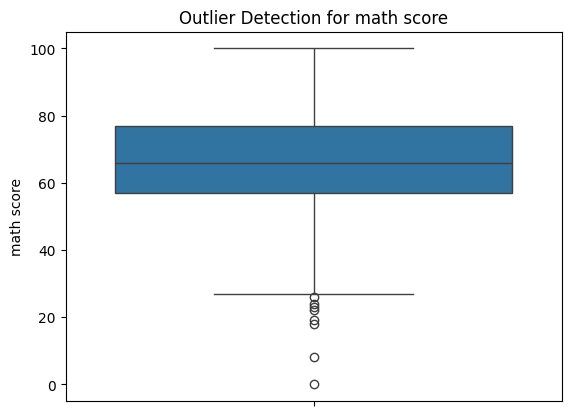

Shape before: (1000, 8), Shape after: (992, 8)


In [21]:
# Boxplot to detect outliers
col = df.select_dtypes(include=np.number).columns[0]
sns.boxplot(df[col])
plt.title(f'Outlier Detection for {col}')
plt.show()

# Remove outliers using IQR method
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
print(f"Shape before: {df.shape}, Shape after: {filtered_df.shape}")


# 📈 8. Spread of Data: Normal vs Skewed

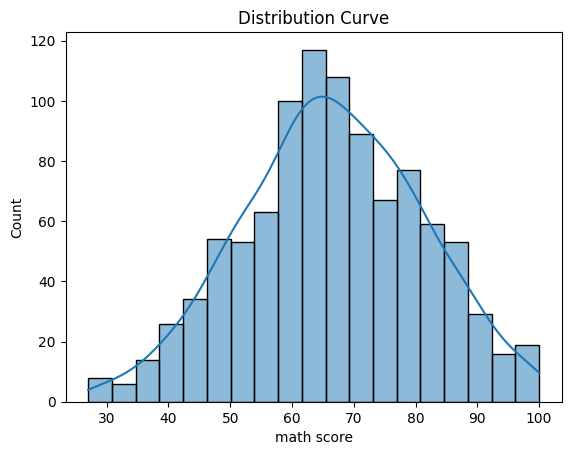

Skewness: -0.06930576171107476
Kurtosis: -0.3242697936242016


In [22]:
# Check distribution
sns.histplot(filtered_df[col], kde=True)
plt.title('Distribution Curve')
plt.show()

# Skewness & Kurtosis
print("Skewness:", filtered_df[col].skew())
print("Kurtosis:", filtered_df[col].kurt())
